In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
movie_data = pd.read_csv("/content/movie_statistic_dataset.csv")
print(movie_data.head())
print("------------------------------------------------------------------------------------------------------")
print(movie_data.columns)
print("------------------------------------------------------------------------------------------------------")
print(movie_data.shape)

# Convert 'production_date' to datetime if it's not already in datetime format
movie_data['production_date'] = pd.to_datetime(movie_data['production_date'])
# Replace the 'production_date' column with just the year (in-place update)
movie_data['production_date'] = movie_data['production_date'].dt.year


                                   movie_title production_date  \
0                     Avatar: The Way of Water      2022-12-09   
1                            Avengers: Endgame      2019-04-23   
2  Pirates of the Caribbean: On Stranger Tides      2011-05-20   
3                      Avengers: Age of Ultron      2015-04-22   
4                       Avengers: Infinity War      2018-04-25   

                     genres  runtime_minutes  director_name  \
0  Action,Adventure,Fantasy            192.0  James Cameron   
1    Action,Adventure,Drama            181.0              -   
2  Action,Adventure,Fantasy            137.0   Rob Marshall   
3   Action,Adventure,Sci-Fi            141.0    Joss Whedon   
4   Action,Adventure,Sci-Fi            149.0              -   

              director_professions director_birthYear director_deathYear  \
0         writer,producer,director               1954              alive   
1                                -                  -                  -

Looking at the dataset, there are a range of values we are given, such as Year, Director, Rating, etc. Determining which of these values need to be dropped due to insignificance or weight will be important.

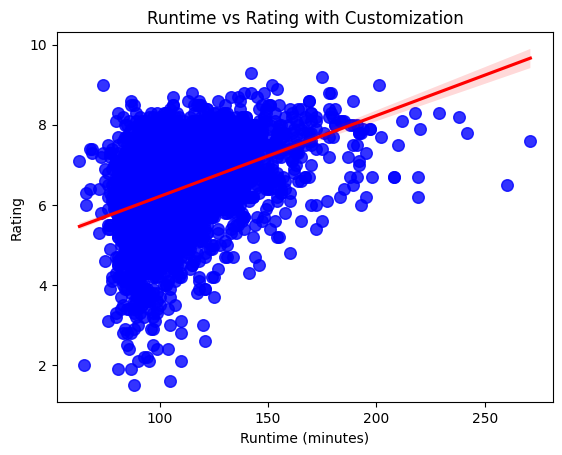

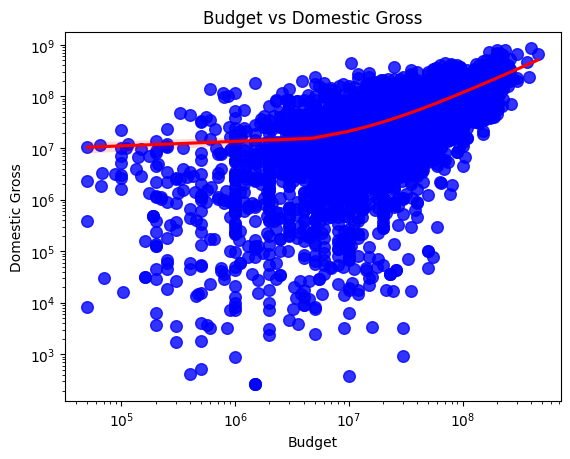

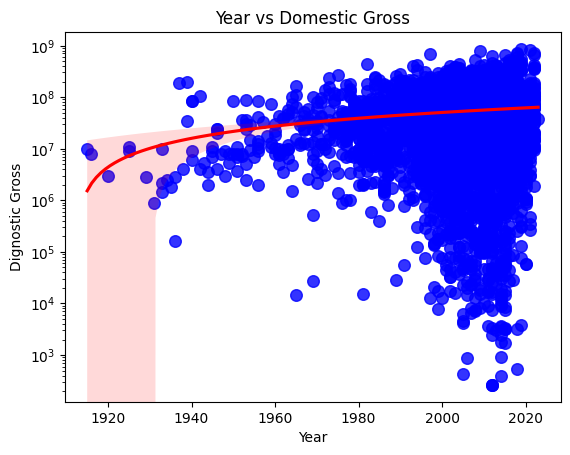

In [ ]:
sns.regplot(data=movie_data, x='runtime_minutes', y='movie_averageRating', scatter_kws={'s': 70, 'color': 'blue'}, line_kws={'color': 'red'})

# Add titles and labels
plt.title('Runtime vs Rating with Customization')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')

# Show the plot
plt.show()
sns.regplot(data=movie_data, x='Production budget $', y='Domestic gross $', scatter_kws={'s': 70, 'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Budget vs Domestic Gross')
plt.xlabel('Budget')
plt.ylabel('Domestic Gross')
plt.xscale('log')
plt.yscale('log')
plt.show()

sns.regplot(data=movie_data, x='production_date', y='Domestic gross $', scatter_kws={'s': 70, 'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Year vs Domestic Gross')
plt.xlabel('Year')
plt.ylabel('Dignostic Gross')
plt.yscale('log')
plt.show()

